# BM 336546 - HW2:

1. Loading the data and preprocessing:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
random.seed(10)

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder
T1D_dataset = pd.read_csv(file) # load the data
T1D_dataset = T1D_dataset.dropna() #removing patients with missing values
T1D_dataset = pd.get_dummies(data=T1D_dataset,prefix=None, drop_first=True) #dummy coding - converting the data to binary

T1D_features = T1D_dataset[['Age','Gender_Male','Increased Urination_Yes','Increased Thirst_Yes','Sudden Weight Loss_Yes','Weakness_Yes','Increased Hunger_Yes',
                              'Genital Thrush_Yes','Visual Blurring_Yes','Itching_Yes','Irritability_Yes','Delayed Healing_Yes','Partial Paresis_Yes',
                              'Muscle Stiffness_Yes','Hair Loss_Yes','Obesity_Yes','Family History']]
diagnosis = T1D_dataset[['Diagnosis_Positive']]

In [2]:
#T1D_features = T1D_features.to_numpy()
#diagnosis = diagnosis.to_numpy()

2. Train-test split:

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(T1D_features, np.ravel(diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(diagnosis))
# log_reg = LogisticRegression(solver='saga', multi_class='ovr', penalty='none', max_iter=10000)
#log_reg = LogisticRegression(random_state=5, penalty='none', max_iter=max_iter, solver=solver)
#x_train = scaler.fit_transform(x_train_orig)
#x_test = scaler.transform(x_test_orig)
# log_reg.fit(x_train_orig, y_train)
# y_pred_train = log_reg.predict(x_train_orig)
# y_pred_test = log_reg.predict(x_test_orig)

# print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test))) + "%")
# print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test, average='macro'))) + "%")

In [14]:
dic_train = {}
dic_test = {}
dic_delta = {}
units = []
for col in T1D_features.columns:        
    dic_train[col] = round(100 * sum(x_train[col])/len(x_train[col]),2)
    dic_test[col] = round(100 * sum(x_test[col])/len(x_test[col]),2)
    dic_delta[col] = dic_train[col] - dic_test[col]
    units.append('%')
dic_train['Age'] = round(sum(x_train['Age'])/len(x_train['Age']),2)
dic_test['Age'] = round(sum(x_test['Age'])/len(x_test['Age']),2)
dic_delta['Age'] = dic_train['Age'] - dic_test['Age']
units[0] = 'years'
table = pd.DataFrame(dic_train.items(), columns=['Feature','Train'])
df_test = pd.DataFrame(dic_test.items(), columns=['Feature','Test'])
df_delta = pd.DataFrame(dic_delta.items(), columns=['Feature','Delta'])
table['Test'] = df_test['Test']
table['Delta'] = df_delta['Delta']
table['units'] = units
print(table)

                    Feature  Train   Test  Delta  units
0                       Age  48.23  47.23   1.00  years
1               Gender_Male  63.40  61.90   1.50      %
2   Increased Urination_Yes  49.76  48.57   1.19      %
3      Increased Thirst_Yes  45.45  40.95   4.50      %
4    Sudden Weight Loss_Yes  40.91  43.81  -2.90      %
5              Weakness_Yes  58.37  59.05  -0.68      %
6      Increased Hunger_Yes  45.69  44.76   0.93      %
7        Genital Thrush_Yes  22.73  20.00   2.73      %
8       Visual Blurring_Yes  44.98  42.86   2.12      %
9               Itching_Yes  49.28  45.71   3.57      %
10         Irritability_Yes  25.12  20.95   4.17      %
11      Delayed Healing_Yes  47.37  40.00   7.37      %
12      Partial Paresis_Yes  42.58  43.81  -1.23      %
13     Muscle Stiffness_Yes  36.60  40.00  -3.40      %
14            Hair Loss_Yes  34.69  34.29   0.40      %
15              Obesity_Yes  15.79  20.95  -5.16      %
16           Family History  49.28  57.14  -7.86

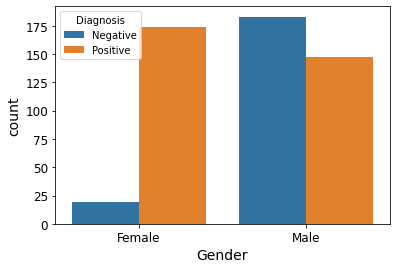

In [15]:
import seaborn as sns

g = sns.countplot(x = 'Gender_Male', hue='Diagnosis_Positive',data = T1D_dataset)
g.set(xticklabels=['Female','Male'])
g.set(xlabel='Gender')
leg = g.get_legend()
leg.set_title("Diagnosis")
labs = leg.texts
labs[0].set_text("Negative")
labs[1].set_text("Positive")

plt.show()
idx_1 = (T1D_dataset['Gender_Male'] == 0).index[(T1D_dataset['Gender_Male'] == 0)].tolist()
idx_2 = (T1D_dataset['Gender_Male'] == 1).index[(T1D_dataset['Gender_Male'] == 1)].tolist()

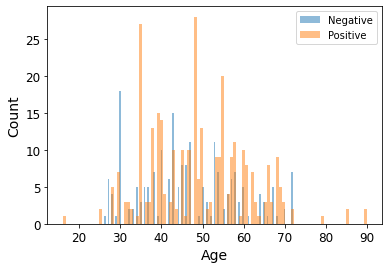

In [16]:
bins = 100
feat = 'Age'
idx_1 = (diagnosis == 0).index[(diagnosis == 0)['Diagnosis_Positive'] == True].tolist()
idx_2 = (diagnosis == 1).index[(diagnosis == 1)['Diagnosis_Positive'] == True].tolist()
plt.hist(T1D_features[feat].loc[idx_1], bins, alpha=0.5, label='Negative')
plt.hist(T1D_features[feat].loc[idx_2], bins, alpha=0.5, label='Positive')
plt.xlabel(feat)
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

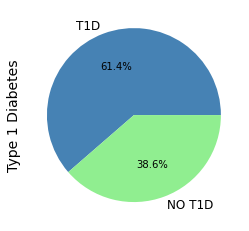

In [17]:
diagnosis.value_counts().plot(kind="pie", labels=['T1D','NO T1D'], colors = ['steelblue', 'lightgreen'], autopct='%1.1f%%', ylabel='Type 1 Diabetes') 
plt.show()

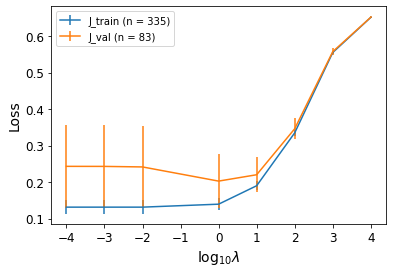

In [23]:
from sklearn.metrics import log_loss

lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=C, max_iter=2000)
    h = 0 # index per split per lambda
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    
    for train_index, val_index in skf.split(x_train, y_train):
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val_fold = scaler.transform(x_val_fold)
        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[h] = log_loss(y_train_fold, y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val_fold)
        J_val_fold[h] = log_loss(y_val_fold, y_pred_val)
        h += 1
        
    J_train[0, idx] = J_train_fold.mean()
    J_train[1, idx] = J_train_fold.std()
    J_val[0, idx] = J_val_fold.mean()
    J_val[1, idx] = J_val_fold.std()

plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])